In [15]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

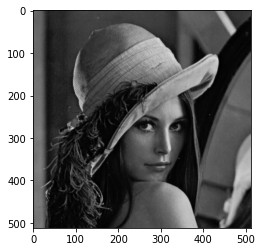

In [18]:
img = cv2.imread('images/img_lena2.png')
plt.figure(figsize=(4,4))
plt.imshow(img,'gray')

In [19]:
sigma = 1.7 # standard deviation
k = np.sqrt(2) # multiplicative factor
rows = len(img[0,:]) # number of rows of the original image
columns = len(img[:,0]) # number of columns of the original image

def generationOfGaussianAndDoGImages(img, sigma, k):
    Gaussian1 = cv2.GaussianBlur(img, (5,5), sigma)
    Gaussian2 = cv2.GaussianBlur(img, (5,5), sigma*k)
    Gaussian3 = cv2.GaussianBlur(img, (5,5), sigma*(k**2))
    Gaussian4 = cv2.GaussianBlur(img, (5,5), sigma*(k**3))
    Gaussian5 = cv2.GaussianBlur(img, (5,5), sigma*(k**4))
    DOG1 = Gaussian2 - Gaussian1
    DOG2 = Gaussian3 - Gaussian2
    DOG3 = Gaussian4 - Gaussian3
    DOG4 = Gaussian5 - Gaussian4
    
    return DOG1, DOG2, DOG3, DOG4, Gaussian1, Gaussian2, Gaussian3, Gaussian4, Gaussian5


In [20]:
# Generation of first octave : size = normal
DOG1_1, DOG2_1, DOG3_1, DOG4_1, Gaussian1_1, Gaussian2_1,\
Gaussian3_1, Gaussian4_1, Gaussian5_1 = generationOfGaussianAndDoGImages(img, sigma, k)
    
# Generation of second octave : size = down-sampled by a factor of 2
img2 = cv2.resize(img,(int(rows/2),int(columns/2)))
DOG1_2, DOG2_2, DOG3_2, DOG4_2, Gaussian1_2, Gaussian2_2,\
Gaussian3_2, Gaussian4_2, Gaussian5_2 = generationOfGaussianAndDoGImages(img2, sigma, k)  

# Generation of third octave : size = down-sampled by a factor of 4
img3 = cv2.resize(img,(int(rows/4),int(columns/4)))
DOG1_3, DOG2_3, DOG3_3, DOG4_3, Gaussian1_3, Gaussian2_3,\
Gaussian3_3, Gaussian4_3, Gaussian5_3 = generationOfGaussianAndDoGImages(img3, sigma, k)

# Generation of fourth octave : size = down-sampled by a factor of 8
img4 = cv2.resize(img,(int(rows/8),int(columns/8)))
DOG1_4, DOG2_4, DOG3_4, DOG4_4, Gaussian1_4, Gaussian2_4,\
Gaussian3_4, Gaussian4_4, Gaussian5_4 = generationOfGaussianAndDoGImages(img4, sigma, k)

<Figure size 432x288 with 0 Axes>

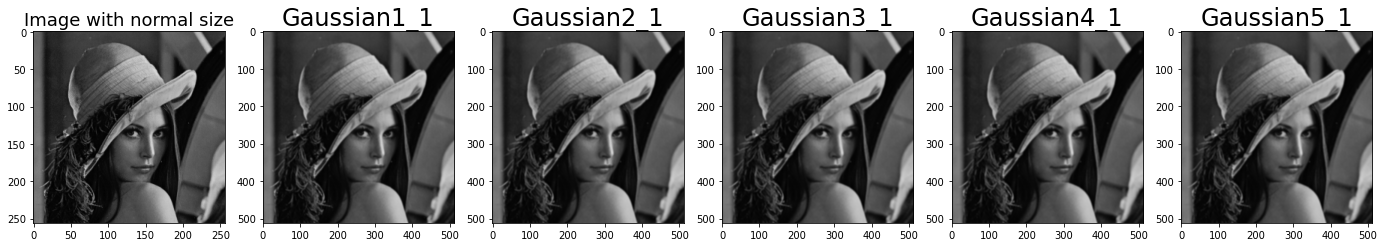

<Figure size 432x288 with 0 Axes>

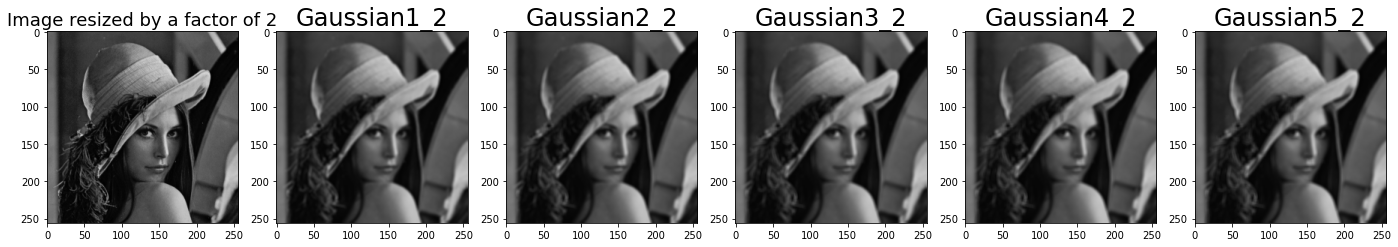

<Figure size 432x288 with 0 Axes>

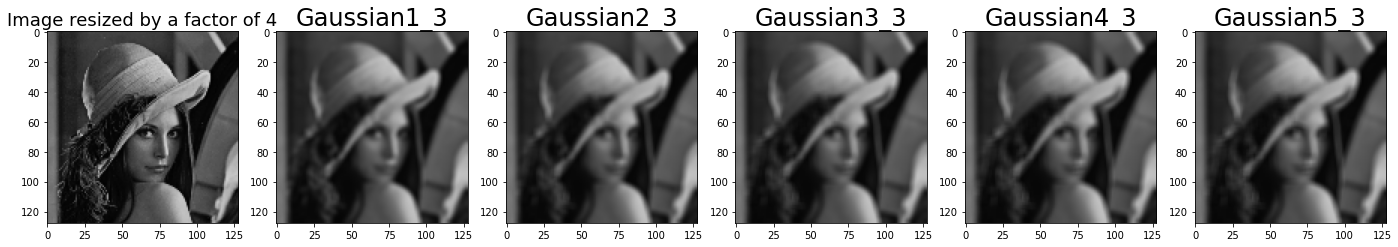

<Figure size 432x288 with 0 Axes>

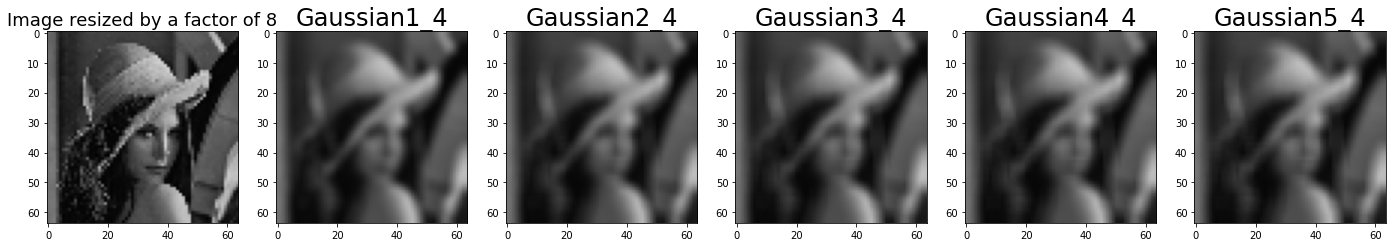

In [21]:
# Plotting the Gaussian images, one line corresponds to an octave

plt.figure()
plt.subplots(1,6,figsize=(24,24))
plt.subplot(161)
plt.imshow(img2,'gray')
plt.title("Image with normal size", fontsize=18)
plt.subplot(162)
plt.imshow(Gaussian1_1,'gray')
plt.title("Gaussian1_1", fontsize=24)
plt.subplot(163)
plt.imshow(Gaussian2_1,'gray')
plt.title("Gaussian2_1", fontsize=24)
plt.subplot(164)
plt.imshow(Gaussian3_1,'gray')
plt.title("Gaussian3_1", fontsize=24)
plt.subplot(165)
plt.imshow(Gaussian4_1,'gray')
plt.title("Gaussian4_1", fontsize=24)
plt.subplot(166)
plt.imshow(Gaussian5_1,'gray')
plt.title("Gaussian5_1", fontsize=24)
plt.show()
plt.figure()
plt.subplots(1,6,figsize=(24,24))
plt.subplot(161)
plt.imshow(img2,'gray')
plt.title("Image resized by a factor of 2", fontsize=18)
plt.subplot(162)
plt.imshow(Gaussian1_2,'gray')
plt.title("Gaussian1_2", fontsize=24)
plt.subplot(163)
plt.imshow(Gaussian2_2,'gray')
plt.title("Gaussian2_2", fontsize=24)
plt.subplot(164)
plt.imshow(Gaussian3_2,'gray')
plt.title("Gaussian3_2", fontsize=24)
plt.subplot(165)
plt.imshow(Gaussian4_2,'gray')
plt.title("Gaussian4_2", fontsize=24)
plt.subplot(166)
plt.imshow(Gaussian5_2,'gray')
plt.title("Gaussian5_2", fontsize=24)
plt.show()
plt.figure()
plt.subplots(1,6,figsize=(24,24))
plt.subplot(161)
plt.imshow(img3,'gray')
plt.title("Image resized by a factor of 4", fontsize=18)
plt.subplot(162)
plt.imshow(Gaussian1_3,'gray')
plt.title("Gaussian1_3", fontsize=24)
plt.subplot(163)
plt.imshow(Gaussian2_3,'gray')
plt.title("Gaussian2_3", fontsize=24)
plt.subplot(164)
plt.imshow(Gaussian3_3,'gray')
plt.title("Gaussian3_3", fontsize=24)
plt.subplot(165)
plt.imshow(Gaussian4_3,'gray')
plt.title("Gaussian4_3", fontsize=24)
plt.subplot(166)
plt.imshow(Gaussian5_3,'gray')
plt.title("Gaussian5_3", fontsize=24)
plt.show()
plt.figure()
plt.subplots(1,6,figsize=(24,24))
plt.subplot(161)
plt.imshow(img4,'gray')
plt.title("Image resized by a factor of 8", fontsize=18)
plt.subplot(162)
plt.imshow(Gaussian1_4,'gray')
plt.title("Gaussian1_4", fontsize=24)
plt.subplot(163)
plt.imshow(Gaussian2_4,'gray')
plt.title("Gaussian2_4", fontsize=24)
plt.subplot(164)
plt.imshow(Gaussian3_4,'gray')
plt.title("Gaussian3_4", fontsize=24)
plt.subplot(165)
plt.imshow(Gaussian4_4,'gray')
plt.title("Gaussian4_4", fontsize=24)
plt.subplot(166)
plt.imshow(Gaussian5_4,'gray')
plt.title("Gaussian5_4", fontsize=24)
plt.show()

<Figure size 432x288 with 0 Axes>

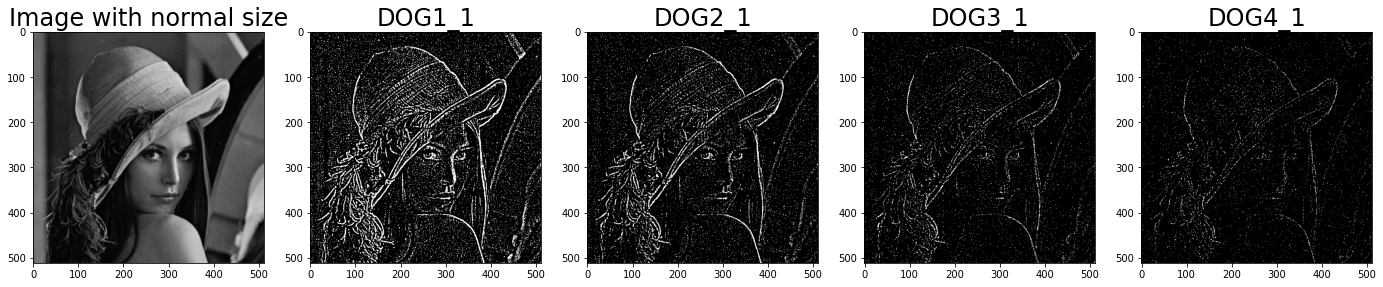

<Figure size 432x288 with 0 Axes>

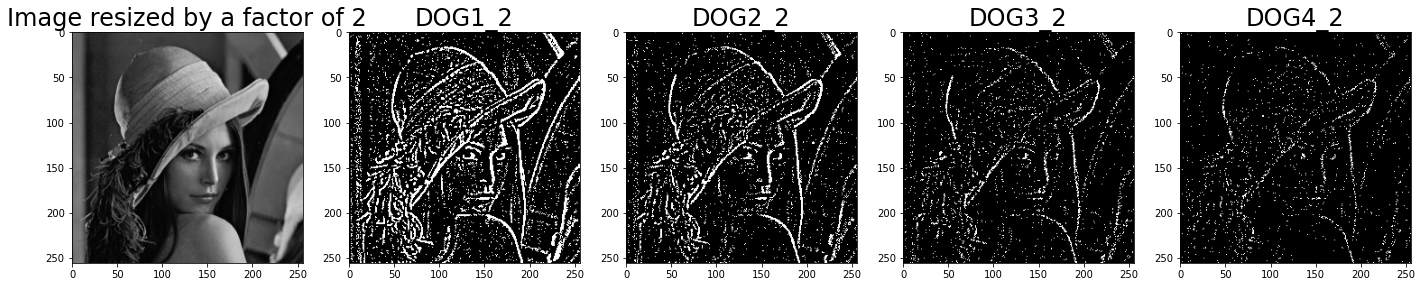

<Figure size 432x288 with 0 Axes>

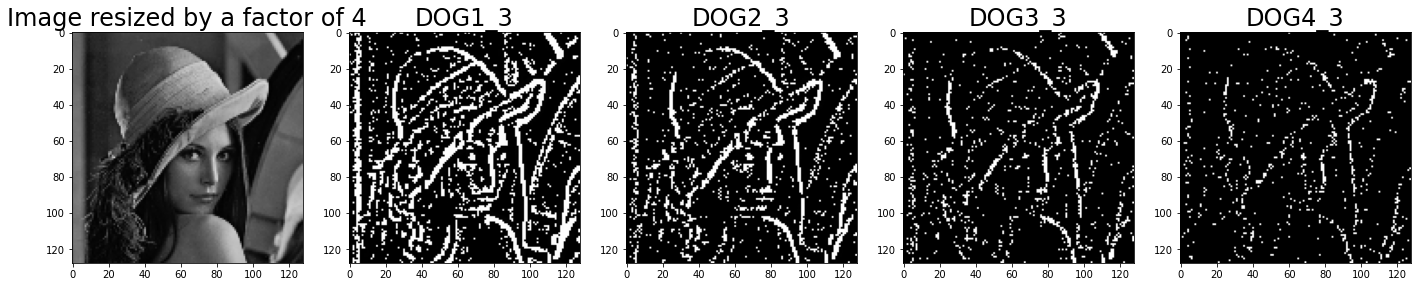

<Figure size 432x288 with 0 Axes>

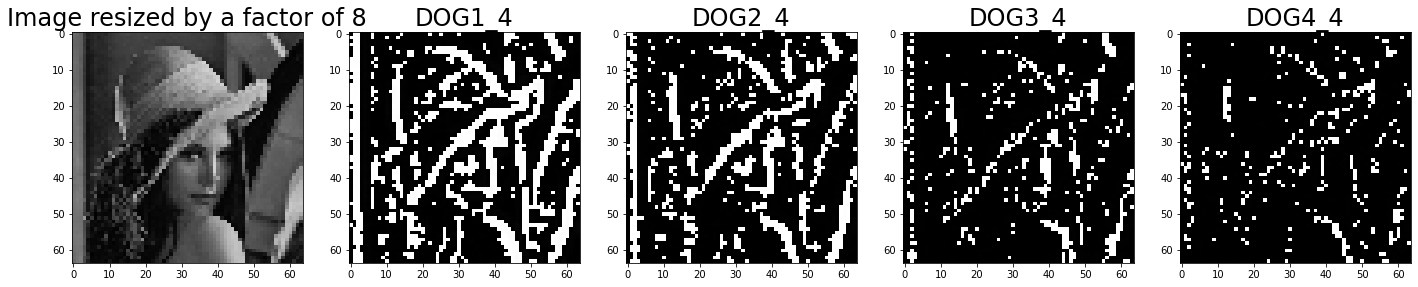

In [22]:
# Plotting the DoGs

plt.figure()
plt.subplots(1,5,figsize=(24,24))
plt.subplot(151)
plt.imshow(img,'gray')
plt.title("Image with normal size", fontsize=24)
plt.subplot(152)
plt.imshow(DOG1_1,'gray')
plt.title("DOG1_1", fontsize=24)
plt.subplot(153)
plt.imshow(DOG2_1,'gray')
plt.title("DOG2_1", fontsize=24)
plt.subplot(154)
plt.imshow(DOG3_1,'gray')
plt.title("DOG3_1", fontsize=24)
plt.subplot(155)
plt.imshow(DOG4_1,'gray')
plt.title("DOG4_1", fontsize=24)
plt.show()
plt.figure()
plt.subplots(1,5,figsize=(24,24))
plt.subplot(151)
plt.imshow(img2,'gray')
plt.title("Image resized by a factor of 2", fontsize=24)
plt.subplot(152)
plt.imshow(DOG1_2,'gray')
plt.title("DOG1_2", fontsize=24)
plt.subplot(153)
plt.imshow(DOG2_2,'gray')
plt.title("DOG2_2", fontsize=24)
plt.subplot(154)
plt.imshow(DOG3_2,'gray')
plt.title("DOG3_2", fontsize=24)
plt.subplot(155)
plt.imshow(DOG4_2,'gray')
plt.title("DOG4_2", fontsize=24)
plt.show()
plt.figure()
plt.subplots(1,5,figsize=(24,24))
plt.subplot(151)
plt.imshow(img3,'gray')
plt.title("Image resized by a factor of 4", fontsize=24)
plt.subplot(152)
plt.imshow(DOG1_3,'gray')
plt.title("DOG1_3", fontsize=24)
plt.subplot(153)
plt.imshow(DOG2_3,'gray')
plt.title("DOG2_3", fontsize=24)
plt.subplot(154)
plt.imshow(DOG3_3,'gray')
plt.title("DOG3_3", fontsize=24)
plt.subplot(155)
plt.imshow(DOG4_3,'gray')
plt.title("DOG4_3", fontsize=24)
plt.show()
plt.figure()
plt.subplots(1,5,figsize=(24,24))
plt.subplot(151)
plt.imshow(img4,'gray')
plt.title("Image resized by a factor of 8", fontsize=24)
plt.subplot(152)
plt.imshow(DOG1_4,'gray')
plt.title("DOG1_4", fontsize=24)
plt.subplot(153)
plt.imshow(DOG2_4,'gray')
plt.title("DOG2_4", fontsize=24)
plt.subplot(154)
plt.imshow(DOG3_4,'gray')
plt.title("DOG3_4", fontsize=24)
plt.subplot(155)
plt.imshow(DOG4_4,'gray')
plt.title("DOG4_4", fontsize=24)
plt.show()

### Now that the octaves are built, let's find the extremas

In [23]:
# A function to find the extremas of a DoG (with the DoG, 
# the previous one and the next one in the octave)

def findExtremas(DoG_prev, DoG, DoG_next):
    DoG1 = DoG_prev.copy()
    DoG2 = DoG.copy()
    DoG3 = DoG_next.copy()
    extremas_x = [] # Location of extremas (x)
    extremas_y = [] # Location of extremas (y)
    for i in range(1, len(DoG2[:-1,0])): # We therefore ignore corners
        for j in range(1, len(DoG2[0,:-1])):
            neighbours = [DoG1[i-1,j+1],DoG1[i,j+1],DoG1[i+1,j+1],DoG1[i-1,j],DoG1[i,j],DoG1[i+1,j], DoG1[i-1,j-1],
                          DoG1[i,j-1],DoG1[i+1,j-1],DoG2[i-1,j+1],DoG2[i,j+1],DoG2[i+1,j+1],DoG2[i-1,j],
                          DoG2[i+1,j], DoG2[i-1,j-1],DoG2[i,j-1],DoG2[i+1,j-1],DoG3[i-1,j+1],DoG3[i,j+1],
                          DoG3[i+1,j+1], DoG3[i-1,j],DoG3[i,j],DoG3[i+1,j],DoG3[i-1,j-1],DoG3[i,j-1],DoG3[i+1,j-1]]
            max_neigh = np.max(neighbours)
            min_neigh = np.min(neighbours)
            if (DoG2[i,j].all() > max_neigh) or (DoG2[i,j].all() < min_neigh): # Then pixel is an extrema
                extremas_x.append(i)
                extremas_y.append(j)
    return extremas_x, extremas_y

In [24]:
# Warning ! This part is quite long to compile (~ 1 mn)

# Extremas for first octave
DOG2_1_extremas_x, DOG2_1_extremas_y = findExtremas(DOG1_1, DOG2_1, DOG3_1)
DOG3_1_extremas_x, DOG3_1_extremas_y = findExtremas(DOG2_1, DOG3_1, DOG4_1)

# Extremas for second octave
DOG2_2_extremas_x, DOG2_2_extremas_y = findExtremas(DOG1_2, DOG2_2, DOG3_2)
DOG3_2_extremas_x, DOG3_2_extremas_y = findExtremas(DOG2_2, DOG3_2, DOG4_2)

# Extremas for third octave
DOG2_3_extremas_x, DOG2_3_extremas_y = findExtremas(DOG1_3, DOG2_3, DOG3_3)
DOG3_3_extremas_x, DOG3_3_extremas_y = findExtremas(DOG2_3, DOG3_3, DOG4_3)

# Extremas for fourth octave
DOG2_4_extremas_x, DOG2_4_extremas_y = findExtremas(DOG1_4, DOG2_4, DOG3_4)
DOG3_4_extremas_x, DOG3_4_extremas_y = findExtremas(DOG2_4, DOG3_4, DOG4_4)


### Now that the extremas are found, let's highlight them on their DOG.

In [25]:
# Function to see better the extremas in each DoG

def highlightExtremas(DOG, DOG_extremas_x, DOG_extremas_y):
    
    DOG_extremas = [] # Creation of a list of [x, y] extrema locations
    for i in range (len(DOG_extremas_x)):
        DOG_extremas.append([DOG_extremas_x[i],DOG_extremas_y[i]])
        
    DOG_copy = DOG.copy()
    for coordonnee in DOG_extremas:
        cv2.circle(DOG_copy,(coordonnee[0], coordonnee[1]),3,[255,0,0],1) # Creation of circles around extremas
                                                                          # to see them better on the plot
    return DOG_copy

<Figure size 432x288 with 0 Axes>

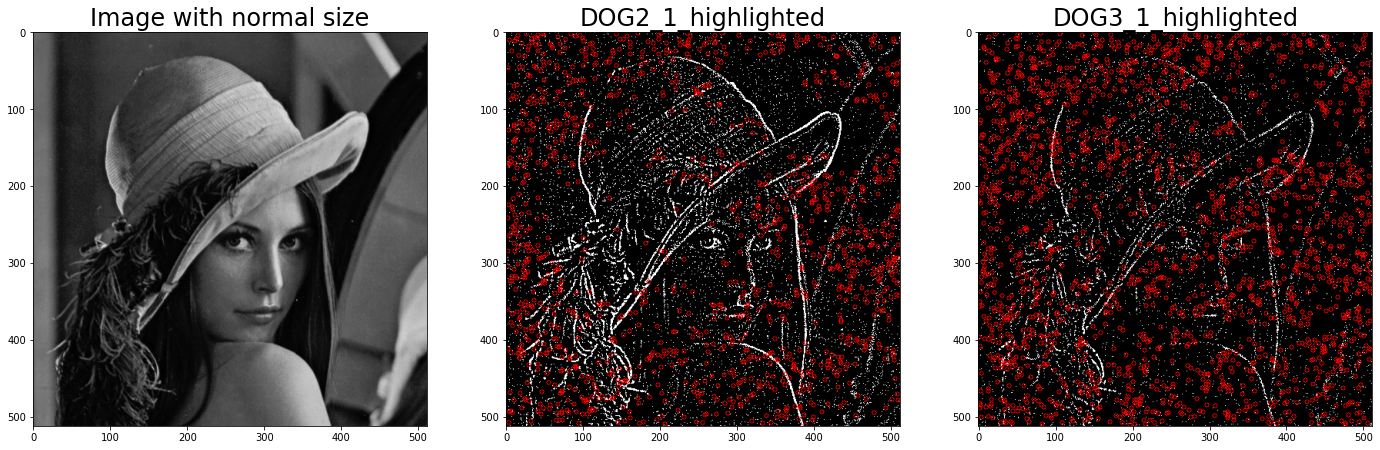

<Figure size 432x288 with 0 Axes>

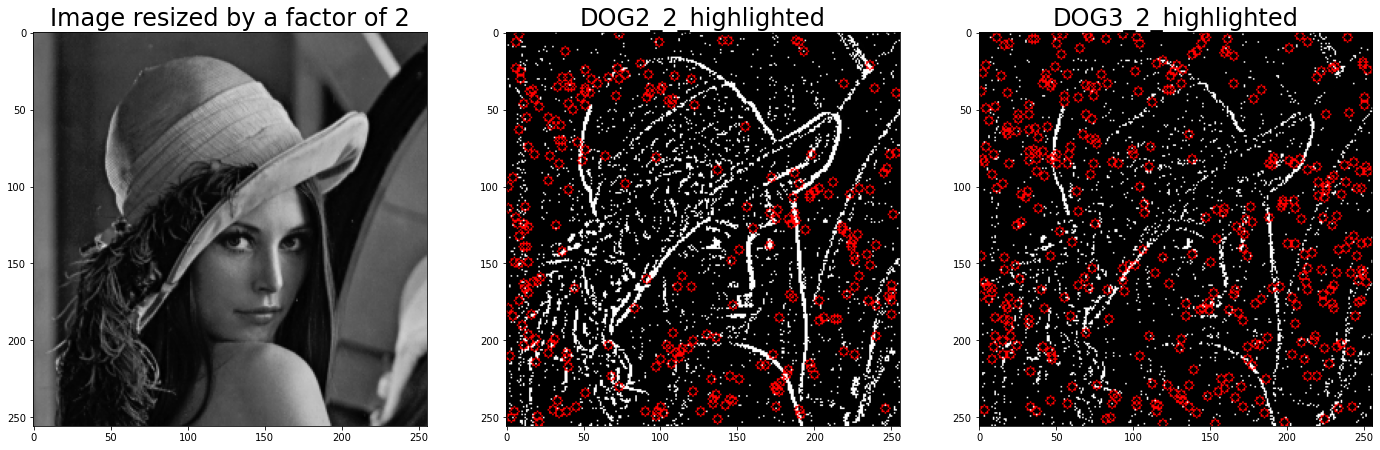

<Figure size 432x288 with 0 Axes>

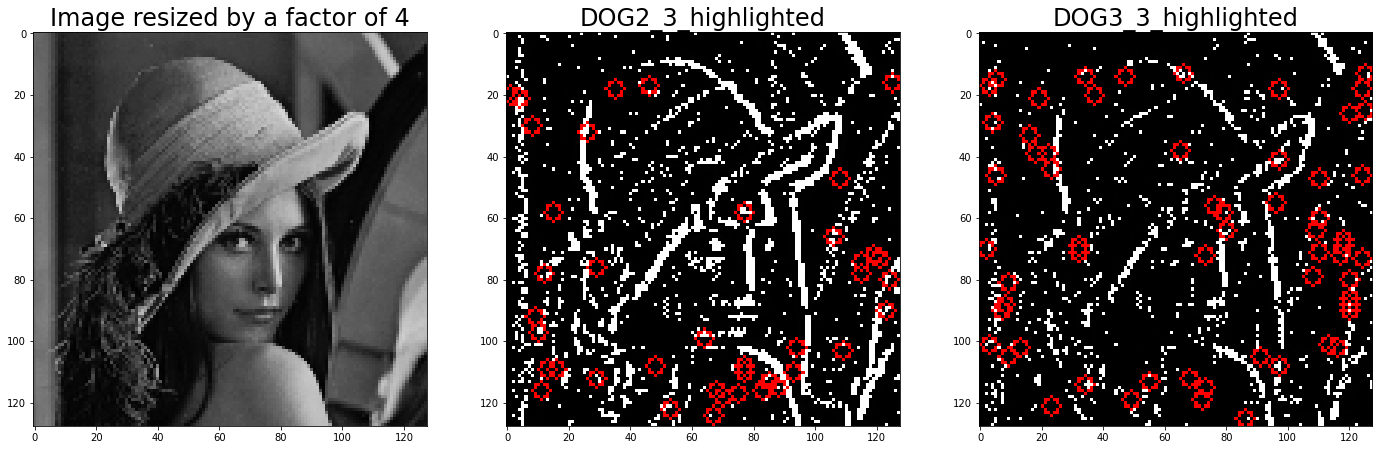

<Figure size 432x288 with 0 Axes>

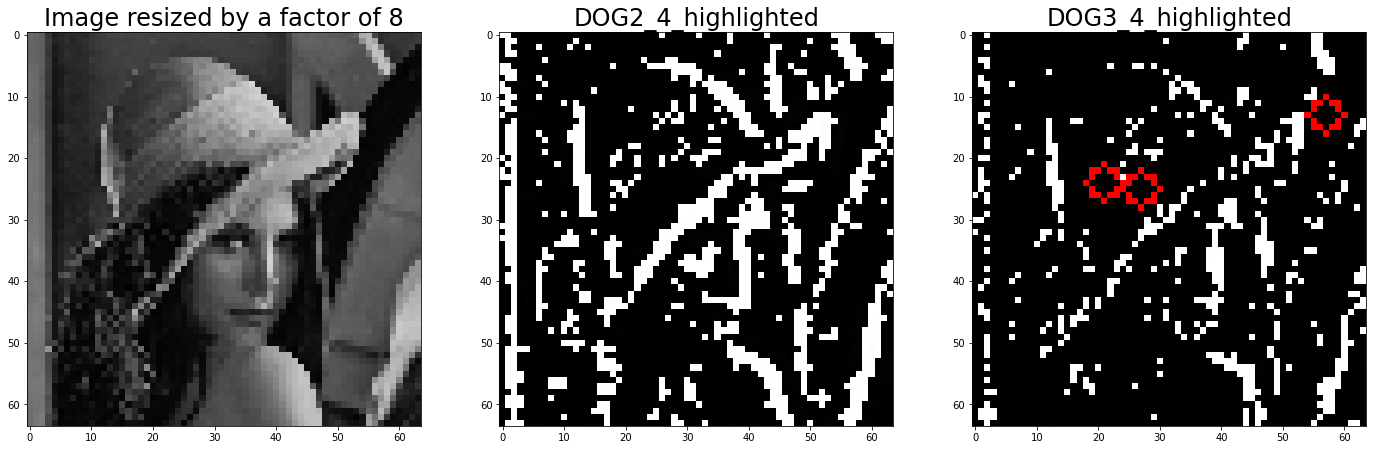

In [26]:
# Highlighting extremas for each DOG

plt.figure()
plt.subplots(1,3,figsize=(24,24))
plt.subplot(131)
plt.imshow(img)
plt.title("Image with normal size", fontsize=24)
plt.subplot(132)
DOG2_1_highlighted = highlightExtremas(DOG2_1, DOG2_1_extremas_x, DOG2_1_extremas_y)
plt.imshow(DOG2_1_highlighted)
plt.title("DOG2_1_highlighted", fontsize=24)
plt.subplot(133)
DOG3_1_highlighted = highlightExtremas(DOG3_1, DOG3_1_extremas_x, DOG3_1_extremas_y)
plt.imshow(DOG3_1_highlighted)
plt.title("DOG3_1_highlighted", fontsize=24)
plt.show()
plt.figure()
plt.subplots(1,3,figsize=(24,24))
plt.subplot(131)
plt.imshow(img2)
plt.title("Image resized by a factor of 2", fontsize=24)
plt.subplot(132)
DOG2_2_highlighted = highlightExtremas(DOG2_2, DOG2_2_extremas_x, DOG2_2_extremas_y)
plt.imshow(DOG2_2_highlighted)
plt.title("DOG2_2_highlighted", fontsize=24)
plt.subplot(133)
DOG3_2_highlighted = highlightExtremas(DOG3_2, DOG3_2_extremas_x, DOG3_2_extremas_y)
plt.imshow(DOG3_2_highlighted)
plt.title("DOG3_2_highlighted", fontsize=24)
plt.show()
plt.figure()
plt.subplots(1,3,figsize=(24,24))
plt.subplot(131)
plt.imshow(img3)
plt.title("Image resized by a factor of 4", fontsize=24)
plt.subplot(132)
DOG2_3_highlighted = highlightExtremas(DOG2_3, DOG2_3_extremas_x, DOG2_3_extremas_y)
plt.imshow(DOG2_3_highlighted)
plt.title("DOG2_3_highlighted", fontsize=24)
plt.subplot(133)
DOG3_3_highlighted = highlightExtremas(DOG3_3, DOG3_3_extremas_x, DOG3_3_extremas_y)
plt.imshow(DOG3_3_highlighted)
plt.title("DOG3_3_highlighted", fontsize=24)
plt.show()
plt.figure()
plt.subplots(1,3,figsize=(24,24))
plt.subplot(131)
plt.imshow(img4)
plt.title("Image resized by a factor of 8", fontsize=24)
plt.subplot(132)
DOG2_4_highlighted = highlightExtremas(DOG2_4, DOG2_4_extremas_x, DOG2_4_extremas_y)
plt.imshow(DOG2_4_highlighted)
plt.title("DOG2_4_highlighted", fontsize=24)
plt.subplot(133)
DOG3_4_highlighted = highlightExtremas(DOG3_4, DOG3_4_extremas_x, DOG3_4_extremas_y)
plt.imshow(DOG3_4_highlighted)
plt.title("DOG3_4_highlighted", fontsize=24)
plt.show()